In [39]:
#可视化数据集在染色体上的分布
#输入为

import numpy as np
import pickle
# from umap import UMAP
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from umap import UMAP

In [ ]:
def plot_MA(data1_path,data2_path,epsilon = 0.00001):
    data1 = pd.read_csv(data1_path, index_col=0)  # 第一组数据的CSV文件路径
    data2 = pd.read_csv(data2_path, index_col=0)  # 第二组数据的CSV文件路径
    # 添加小常数以避免零值
    epsilon = 0.00001 
    data1 = data1 + epsilon
    data2 = data2 + epsilon

    # 计算每组数据的平均值
    data1_mean = data1.mean(axis=1)
    data2_mean = data2.mean(axis=1)

    # 计算M值（对数差异），使用对数运算来处理零值
    M = np.log2(data1_mean / data2_mean)

    # 计算A值（平均表达水平）
    A = (np.log2(data1_mean) + np.log2(data2_mean)) / 2

    print("绘制点的数量：",len(M))

    # 绘制 M-Versus-A Plot
    plt.scatter(A, M, s=10, alpha=0.5)
    plt.xlabel('A (Average Expression)')
    plt.ylabel('M (Log-Fold Change)')
    plt.title('MA plot')
    plt.grid(True)
    plt.show()

In [52]:
group_id = 'compartment_raw'
df = '/home/notebook/scCompartment_cortex250k.hdf5'
file_pc = h5py.File(df, 'r')
bin_chr = np.array([chrom.decode('utf-8') for chrom in file_pc['compartment_raw']['bin']['chrom']])

file_shap = h5py.File('/home/notebook/compartment_raw/compartemnt_250k_chr.h5', 'r')
cell_keys = list(filter(lambda key: 'cell_' in key, file_pc[group_id].keys()))
cell_list_len=len(cell_keys)

# datasets = [file[group_id][f'cell_{i}'][()] for i in range(cell_list_len)]
# data = pd.DataFrame({f'cell_{i}': dataset for i, dataset in enumerate(datasets)})


In [85]:
cell_type_info=pickle.load(open('/home/notebook/label_info.pickle', "rb"))
cell_type=cell_type_info['cell_type']

In [86]:
list(set(cell_type))

['CX2', 'CX1', 'CX3']

In [87]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# 使用fit_transform方法进行标签转换
cell_index = label_encoder.fit_transform(cell_type)



In [88]:
cell_index

array([0, 0, 0, ..., 2, 2, 2])

In [59]:
file_shap[group_id][f'cell_1'][0,:].shape

(9619,)

In [128]:
datasets = [file_shap[group_id][f'cell_{i+1}'][cell_index[i],:] for i in range(cell_list_len) ]
data = pd.DataFrame({f'cell_{i}': dataset for i, dataset in enumerate(datasets)})

In [93]:
datasets[0].shape

(9619,)

In [121]:
datasets = [file_pc[group_id][f'cell_{i}'][()] for i in range(cell_list_len)]
data = pd.DataFrame({f'cell_{i}': dataset for i, dataset in enumerate(datasets)})

In [122]:
data = pd.DataFrame({f'cell_{i}': dataset for i, dataset in enumerate(datasets)})

In [127]:
data


,cell_0,cell_1,cell_2,cell_3,cell_4,cell_5,cell_6,cell_7,cell_8,cell_9,...,cell_1065,cell_1066,cell_1067,cell_1068,cell_1069,cell_1070,cell_1071,cell_1072,cell_1073,cell_1074
0,-0.697346,0.008234,-0.513082,0.211298,0.470711,-1.408733,-0.042084,-0.671494,-1.185891,0.654488,...,0.842340,-1.100201,0.331163,-0.111828,0.760511,0.857577,0.240597,-0.624905,0.376568,0.123344
1,-0.680798,-0.251349,-0.382949,0.282342,0.573564,-1.533219,-0.395838,-0.833004,-1.153212,0.519252,...,0.495427,-1.127512,0.487573,-0.158945,0.763815,0.858390,0.427526,-0.738911,0.491805,0.174681
2,-0.867141,-0.402763,-0.260217,0.117517,0.563498,-1.658467,-1.038135,-0.841350,-1.343906,-0.180308,...,-0.014493,-1.435880,0.627065,-0.173505,0.650934,0.767156,0.484987,-0.982163,0.561316,0.117895
3,-1.044201,-0.533744,-0.208767,-0.432766,0.527250,-1.868738,-1.284584,-0.862286,-1.629617,-0.841602,...,-0.356199,-1.448039,0.719298,-0.229835,0.396340,0.585238,0.376818,-1.173191,0.483927,-0.037852
4,-0.997593,-0.569995,-0.244160,-0.679749,0.520078,-2.156762,-1.241946,-1.046231,-1.726700,-1.118567,...,-0.518826,-1.374885,0.781722,-0.257838,0.290084,0.407456,0.272321,-1.015235,0.322032,-0.118544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10278,1.319473,-1.248297,0.395714,0.242485,-0.809671,-1.493008,-0.463131,0.362849,0.383079,-1.551507,...,0.753237,0.662261,-0.417373,0.137475,-0.743437,0.473274,-0.565310,0.362257,0.864645,0.212797
10279,2.400627,-1.148703,0.555066,0.252114,-0.670865,-1.348857,-0.430196,0.298192,0.291146,-1.603816,...,0.846028,0.459311,-0.324939,0.155365,-0.661663,0.469019,-0.715707,0.348443,1.207085,0.450169
10280,3.322588,0.410427,1.812980,0.489277,0.972548,-0.191801,0.937532,0.847689,1.068804,-0.125281,...,1.283027,0.836587,0.843819,0.671026,0.999501,1.595038,1.199704,0.988031,2.008730,1.723380
10281,2.782154,2.475783,2.500019,0.786183,2.515462,2.396469,2.902479,2.512569,2.869440,2.700693,...,1.872874,1.904086,1.717954,1.809452,2.266960,2.033014,2.366483,2.111158,2.039465,1.778982


In [137]:
chr_data = data.iloc[np.where(bin_chr == 'chr19')[0], :]
# chr_data = data
cell_embeddings = np.array(chr_data.T)
cell_embeddings.shape

(1075, 234)

In [124]:
cell_embeddings = np.array(chr_data.T)
cell_embeddings.shape

(1075, 770)

In [126]:
cell_embeddings.shape

(1075, 770)

In [44]:
cell_type_info=pickle.load(open('/home/notebook/label_info.pickle', "rb"))
cell_type=cell_type_info['cell_type']
len(cell_type)

1075

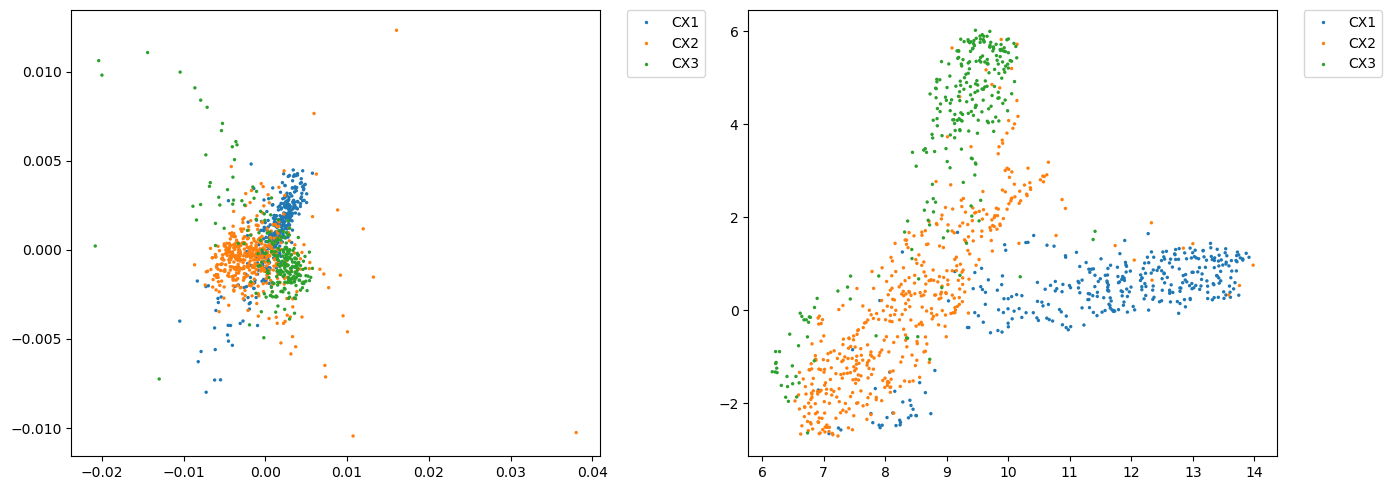

In [138]:

fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)

sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
# sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)


ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)


plt.tight_layout()
plt.show()

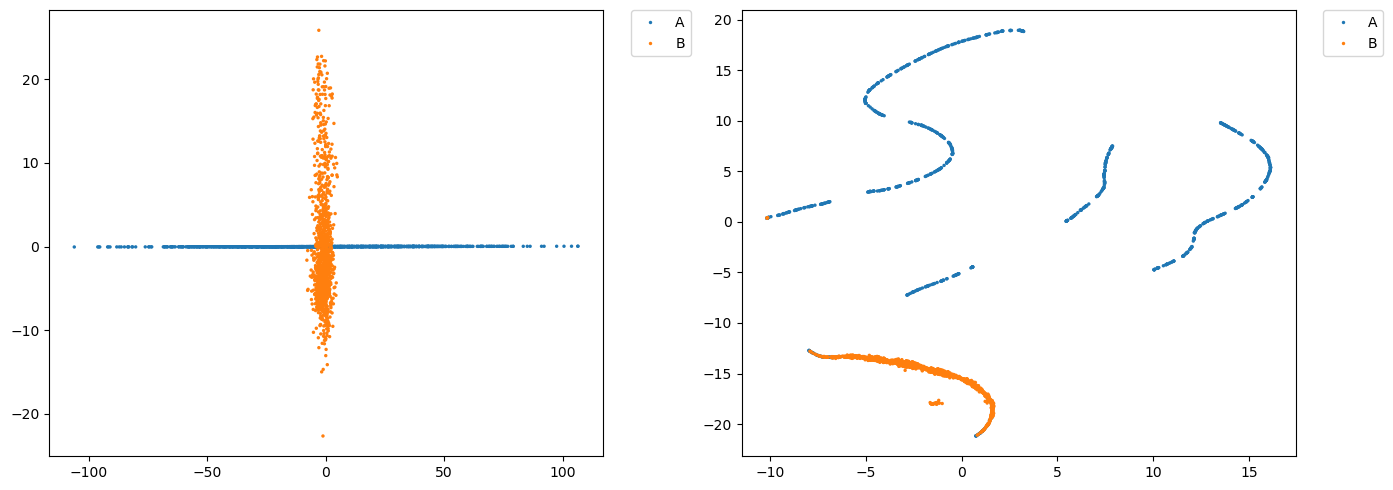

In [174]:
#可视化 模拟数据改变fold change分布变化
parm = 'mean4'
# data1_path = '/home/dataset/sim_data/cellcycle/1m/compartment_raw_0_1171.csv_mean1+var1.csv'
data1_path = '/home/dataset/sim_data/cellcycle/1m/compartment_raw_0_1171.csv_mean2.csv'
data2_path = '/home/dataset/sim_data/cellcycle/1m/compartment_raw_0_1171.csv_'+parm+'.csv'
# data2_path = '/home/dataset/sim_data/cellcycle/1m/compartment_raw_0_1171.csv'

data1 = pd.read_csv(data1_path,index_col=0)
data2 = pd.read_csv(data2_path,index_col=0)
# data3 = pd.read_csv(data3_path,index_col=0)
a=data1.iloc[:,:-5]
# b=data2.iloc[:,:-5]
b=data2
# c=data3.iloc[:,:-5]
data=pd.merge(a,b,left_index=True,right_index=True)
# data=pd.merge(data,c,left_index=True,right_index=True)
label1=['A']*a.shape[1]
label2=['B']*a.shape[1]
# label3=['C']*a.shape[1]
label=[]
label.extend(label1)
label.extend(label2)

cell_embeddings1 = np.array(data.T)
cell_type = label

fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)

sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
# sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)


ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)


plt.tight_layout()
plt.show()


In [168]:
cell_embeddings1 = np.array(data.T)
cell_type = label
# cell_embeddings2 = np.array(a.T)
# cell_type2 = label2



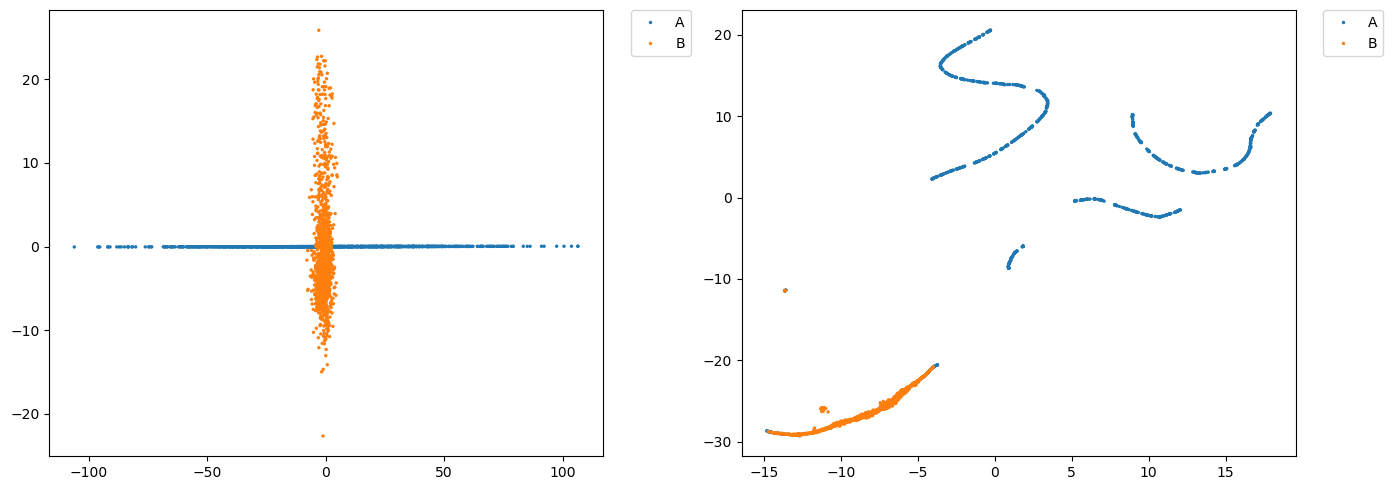

In [169]:
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)

sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
# sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)


ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)


plt.tight_layout()
plt.show()

(2582, 2342)

In [148]:
cell_embeddings = np.array(data.T)
cell_type = label
cell_embeddings.shape


(2342, 2582)

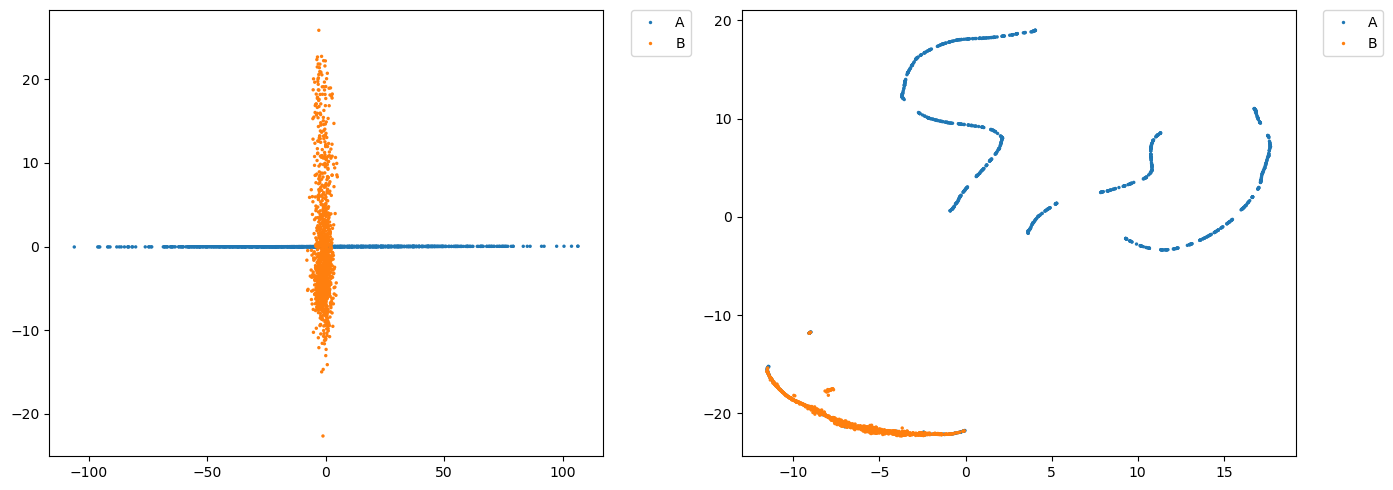

In [149]:
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)

sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
# sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)


ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)


plt.tight_layout()
plt.show()

In [152]:
def plot_MA(data1_path,data2_path,epsilon = 0.00001):
    data1 = pd.read_csv(data1_path, index_col=0)  # 第一组数据的CSV文件路径
    data2 = pd.read_csv(data2_path, index_col=0)  # 第二组数据的CSV文件路径
    data1 =data1.iloc[:,:-5]
    data2 =data2.iloc[:,:-5]
    # 添加小常数以避免零值
    epsilon = 0.00001 
    data1 = data1 + epsilon
    data2 = data2 + epsilon

    # 计算每组数据的平均值
    data1_mean = data1.mean(axis=1)
    data2_mean = data2.mean(axis=1)

    # 计算M值（对数差异），使用对数运算来处理零值
    M = np.log2(data1_mean / data2_mean)

    # 计算A值（平均表达水平）
    A = (np.log2(data1_mean) + np.log2(data2_mean)) / 2

    print("绘制点的数量：",len(M))

    # 绘制 M-Versus-A Plot
    plt.scatter(A, M, s=10, alpha=0.5)
    plt.xlabel('A (Average Expression)')
    plt.ylabel('M (Log-Fold Change)')
    plt.title('MA plot')
    plt.grid(True)
    plt.show()



In [155]:
parm = 'mean2'
data1_path = '/home/dataset/sim_data/cellcycle/1m/compartment_raw_0_1171.csv_mean1+var1.csv'
data2_path = '/home/dataset/sim_data/cellcycle/1m/compartment_raw_0_1171.csv_'+parm+'.csv'
# data2_path = '/home/dataset/sim_data/cellcycle/1m/compartment_raw_0_1171.csv'
# plot_MA(data1_path,data2_path,epsilon = 0.00001)

/usr/local/anaconda/envs/hic/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


绘制点的数量： 2582


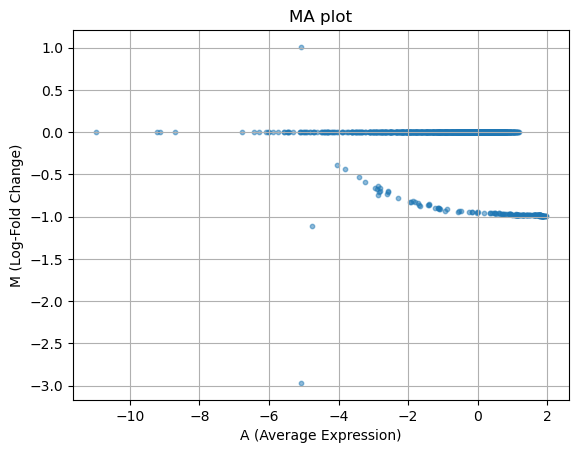

In [156]:
data1 = pd.read_csv(data1_path, index_col=0)  # 第一组数据的CSV文件路径
data2 = pd.read_csv(data2_path, index_col=0)  # 第二组数据的CSV文件路径
data1 =data1.iloc[:,:-5]
data2 =data2.iloc[:,:-5]
# 添加小常数以避免零值
epsilon = 0.00001 
data1 = data1 + epsilon
data2 = data2 + epsilon

# 计算每组数据的平均值
data1_mean = data1.mean(axis=1)
data2_mean = data2.mean(axis=1)

# 计算M值（对数差异），使用对数运算来处理零值
M = np.log2(data1_mean / data2_mean)

# 计算A值（平均表达水平）
A = (np.log2(data1_mean) + np.log2(data2_mean)) / 2

print("绘制点的数量：",len(M))

# 绘制 M-Versus-A Plot
plt.scatter(A, M, s=10, alpha=0.5)
plt.xlabel('A (Average Expression)')
plt.ylabel('M (Log-Fold Change)')
plt.title('MA plot')
plt.grid(True)
plt.show()
